In [0]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import os
import numpy as np


In [0]:
moviesDF = pd.read_csv('movies_combined.csv')

In [0]:
moviesDF.head(20)


,year,movie title,rating,genre,star,director,writer,country,company,score,votes,budget,gross,gross us,gross overseas,runtime,released,more success overseas,rating_encoded
0,2003,A Man Apart,R,Action,Vin Diesel,F. Gary Gray,Christian Gudegast,USA,"""DIA"" Productions GmbH & Co. KG",6.1,40381,36000000,NaN,26183197,NaN,109,4/4/2003,UNK,8
1,2000,Yi Yi,NOT RATED,Drama,Nien-Jen Wu,Edward Yang,Edward Yang,Taiwan,1+2 Seisaku Iinkai,8.1,14617,0,NaN,1136776,NaN,173,12/16/2000,UNK,4
2,1998,Chairman of the Board,PG-13,Comedy,Scott 'Carrot Top' Thompson,Alex Zamm,Al Septien,USA,101st Street Films,2.3,5356,0,NaN,306715,NaN,100,9/18/1998,UNK,7
3,2010,The Romantics,PG-13,Comedy,Katie Holmes,Galt Niederhoffer,Galt Niederhoffer,USA,10th Hole Productions,5.1,10547,4500000,NaN,103280,NaN,100,5/26/2010,UNK,7
4,2002,Irreversible,NOT RATED,Crime,Monica Bellucci,Gaspar Noé,Gaspar Noé,France,120 Films,7.4,95140,0,NaN,753501,NaN,97,5/22/2002,UNK,4
5,2000,Werckmeister Harmonies,Not specified,Drama,Lars Rudolph,Béla Tarr,László Krasznahorkai,Hungary,13 Productions,8.3,9773,0,NaN,25461,NaN,145,2/1/2001,UNK,5
6,1999,Bicentennial Man,PG,Comedy,Robin Williams,Chris Columbus,Isaac Asimov,USA,1492 Pictures,6.8,94773,100000000,NaN,58220776,NaN,132,12/17/1999,UNK,6
7,1996,Jingle All the Way,PG,Comedy,Arnold Schwarzenegger,Brian Levant,Randy Kornfield,USA,1492 Pictures,5.5,74318,60000000,NaN,60573641,NaN,89,11/22/1996,UNK,6
8,2015,Jane Got a Gun,R,Action,Natalie Portman,Gavin O'Connor,Brian Duffield,USA,1821 Pictures,5.9,15689,25000000,NaN,1512815,NaN,98,1/29/2016,UNK,8
9,2003,From Justin to Kelly,PG,Comedy,Kelly Clarkson,Robert Iscove,Kim Fuller,USA,19 Entertainment,2.1,23990,12000000,NaN,4922166,NaN,81,6/20/2003,UNK,6


In [0]:
print('Shape of the dataframe is movies',moviesDF.shape)
moviesDF.dtypes

Shape of the dataframe is movies (6820, 18)


year                       int64
movie title               object
rating                    object
genre                     object
star                      object
director                  object
writer                    object
country                   object
company                   object
score                    float64
votes                      int64
budget                     int64
gross                    float64
gross us                   int64
gross overseas           float64
runtime                    int64
released                  object
more success overseas     object
dtype: object

In [0]:
moviesDF['year'] = pd.to_datetime(moviesDF.year,format='%Y')
moviesDF['released'] = pd.to_datetime(moviesDF.released)
moviesDF_year_sort = moviesDF.sort_values(by='released',ascending=True)

In [0]:
high_dollars = ['Action','Drama','Comedy','Crime','Adventure','Animation','Horror','Biography']

money_making_genres = moviesDF_year_sort[moviesDF_year_sort['genre'].isin(high_dollars)]

In [0]:
px.histogram(moviesDF,x='genre',title='Genre Histogram',labels={})


In [0]:
fig = go.Figure(data = [
    go.Bar(name='Budget', x = moviesDF.genre, y = moviesDF['budget'],marker_color = 'rgb(26,118,255)'),
    go.Bar(name='Gross US', x = moviesDF.genre, y = moviesDF['gross us'],marker_color = 'rgb(55,83,109)')
])
fig.update_layout(barmode='group', title_text = 'Budgets and Gross US by Genre',
                  yaxis=dict(title='USD (Billions)'),
                  xaxis=dict(title='Genre'))
fig.show()

In [0]:
px.line(money_making_genres, x='released', y='gross us', facet_col='genre',
        title='Time Series for Highest Grossing Genres')

In [0]:
px.line(money_making_genres[money_making_genres['genre'] == 'Action'], x='released', y='gross us',title='Action Timeseries')

In [0]:
px.scatter(moviesDF_year_sort,y='gross us',x='score',title='Gross/Score Scatter')

In [0]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(moviesDF['rating'])

LabelEncoder()

In [0]:
list(le.classes_)

['B',
 'B15',
 'G',
 'NC-17',
 'NOT RATED',
 'Not specified',
 'PG',
 'PG-13',
 'R',
 'TV-14',
 'TV-MA',
 'TV-PG',
 'UNRATED']

In [0]:
moviesDF['rating_encoded'] = le.transform(moviesDF['rating'])

In [0]:
moviesDF = moviesDF.drop(columns=['gross','gross overseas'])

In [0]:
moviesDF.columns

Index(['year', 'movie title', 'rating', 'genre', 'star', 'director', 'writer',
       'country', 'company', 'score', 'votes', 'budget', 'gross us', 'runtime',
       'released', 'more success overseas', 'rating_encoded'],
      dtype='object')

In [0]:
X = moviesDF.drop(columns=['year', 'movie title', 'rating', 'genre', 'star', 'director', 'writer',
       'country', 'company', 'released', 'more success overseas'])

In [0]:
print(X.isna().sum())

score             0
votes             0
budget            0
gross us          0
runtime           0
rating_encoded    0
dtype: int64


In [0]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)

y_km = km.fit_predict(X)

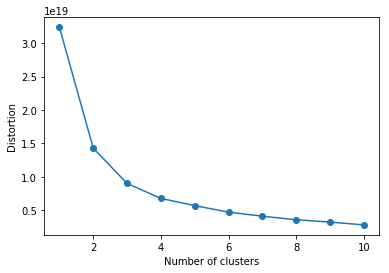

In [0]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [0]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_km
y_kmeans1=y_km+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
X['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(X.groupby('cluster').mean(),1))
kmeans_mean_cluster

,score,votes,budget,gross us,runtime,rating_encoded
cluster,,,,,,
1,6.8,280585.4,100637383.5,170443025.7,116.4,6.7
2,6.3,48599.2,16363840.8,18780063.0,105.5,7.2
